# 🚕 Análisis Estratégico de Movilidad Urbana: Zuber en Chicago
**Optimización de Operaciones basada en Competencia y Factores Climáticos**

**Proyecto ID:** 08 

---

### 📑 Contexto de Negocio
Zuber, una startup de viajes compartidos, busca irrumpir en el mercado de Chicago. Para garantizar un lanzamiento exitoso, este análisis profundiza en el comportamiento de los pasajeros, la cuota de mercado de las empresas de taxis establecidas y el impacto del clima en la demanda.


 **Estructura del Proyecto (Roadmap de Análisis):**
* **Fase 1: Ingeniería de Datos**: Ingesta, perfilado y validación de activos de datos (SQL Output).
* **Fase 2: Análisis de Cuota de Mercado**: Diagnóstico de la estructura competitiva y líderes de la industria.
* **Fase 3: Perfilado Geográfico**: Identificación de nodos de demanda crítica (Hotspots urbanos).
* **Fase 4: Validación Inferencial**: Segmentación y prueba de hipótesis sobre el impacto de la "fricción climática".
* **Fase 5: Directrices Estratégicas**: Conclusiones ejecutivas y recomendaciones para el despliegue de Zuber.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# --- Configuración Estética Global ---
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
PALETTE = sns.color_palette("viridis", 10)
COLOR_HIGHLIGHT = "#2E86C1" # Azul ejecutivo para énfasis


### 🛠️ Fase 1: Ingeniería de Datos y Perfilado de Activos
En esta etapa fundamental, se realiza la ingesta y auditoría técnica de los conjuntos de datos extraídos mediante SQL. El objetivo es garantizar la integridad de la información, validar los tipos de datos y preparar las estructuras para el análisis avanzado.

**Protocolo de Ejecución:**
* **Sanitización de Esquemas**: Verificación de tipos de datos (Dtypes) y detección de valores nulos o inconsistencias.
* **Normalización Temporal**: Inferencia y conversión de series de tiempo para habilitar el análisis de impacto por ventanas horarias y días específicos.
* **Evaluación de Muestras**: Diagnóstico del volumen de registros en las fuentes de mercado (`result_01`), demanda geográfica (`result_04`) y factores climáticos (`result_07`).

In [20]:
# Data Engineering & Sanitization
def load_and_profile(file_path):
    """Carga datos y realiza perfilado inicial de integridad."""
    df = pd.read_csv(file_path)
    print(f"\n📄 Perfilado: {file_path}")
    print(df.info())
    return df

# Carga de datasets
df_company = load_and_profile('moved_project_sql_result_01.csv')
df_dropoff = load_and_profile('moved_project_sql_result_04.csv')
df_weather = load_and_profile('moved_project_sql_result_07.csv')

# Conversión de tipos de datos: Inferencia temporal
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'], format='%Y-%m-%d %H:%M:%S')


📄 Perfilado: moved_project_sql_result_01.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

📄 Perfilado: moved_project_sql_result_04.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

📄 Perfilado: moved_project_sql_result_07.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------    

##### 📊 Diagnóstico de la Estructura de Datos
Tras la ejecución del protocolo de perfilado, se confirman los siguientes hallazgos técnicos que validan la continuidad del análisis:

1. **Integridad de Fuentes**: Se observa una ausencia total de valores nulos en los tres datasets principales, lo que garantiza una base sólida para la inferencia estadística sin necesidad de técnicas de imputación.
2. **Consistencia de Tipos**:
   * Los registros de movilidad por empresa y ubicación se encuentran correctamente tipificados como valores numéricos (`int64` y `float64`).
   * La columna `start_ts` ha sido transformada con éxito al formato `datetime64`, permitiendo segmentaciones precisas por día de la semana.
3. **Robustez de la Muestra Climática**: Con **1,068 registros** en el dataset de impacto ambiental (`result_07`), contamos con una muestra estadísticamente representativa para ejecutar pruebas de hipótesis de dos colas con un alto nivel de confianza.

### 📊 Fase 2: Análisis de Cuota de Mercado y Estructura Competitiva
En esta sección se evalúa la arquitectura competitiva de la industria del transporte en Chicago. El objetivo es identificar a los actores dominantes y cuantificar la distribución del volumen de viajes, permitiendo diagnosticar el grado de concentración del mercado y las barreras de entrada para nuevos competidores como **Zuber**.

**Estrategia de Visualización:**
* **Despliegue Horizontal**: Optimización de la legibilidad para entidades corporativas con nombres extensos.
* **Auditoría de Datos Directa**: Inclusión de etiquetas con formato de millares para facilitar la interpretación operativa inmediata.
* **Análisis de Concentración**: Enfoque en el "Top 10" para aislar los componentes que representan la mayor parte de la actividad económica del sector.

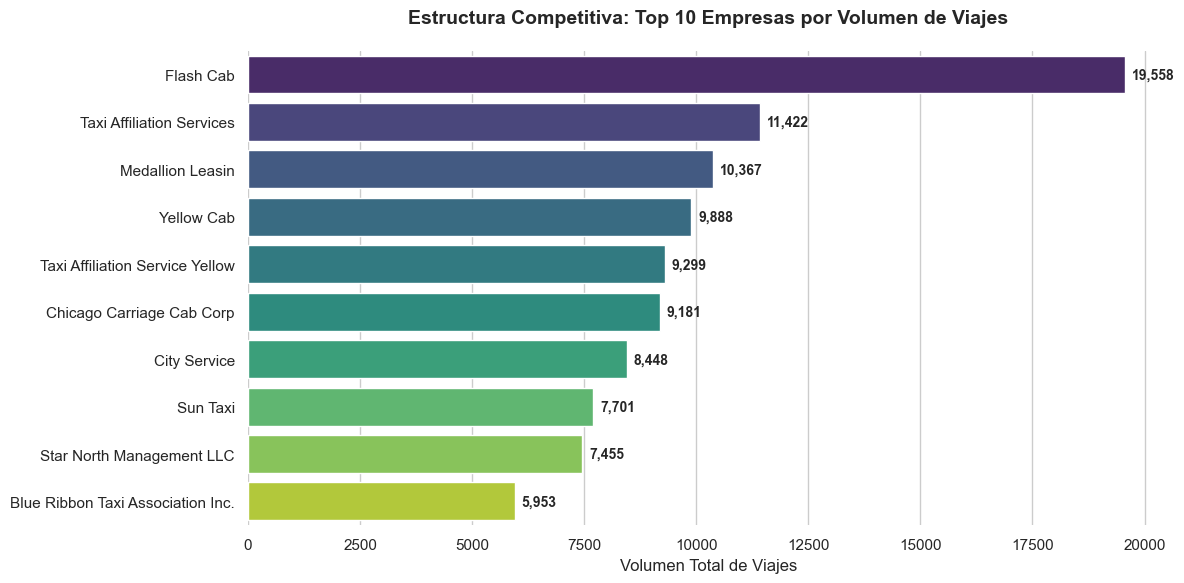

In [22]:
# Análisis de Competencia y Geografía (Visualización de Impacto)
def plot_executive_bar(df, x, y, title, xlabel, color_mode="palette"):
    """
    Despliegue de métricas de volumen mediante visualización horizontal.
    Optimiza el contraste entre entidades de mercado y facilita el diagnóstico de outliers.
    """
    data = df.sort_values(by=y, ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    
    # Ajuste de sintaxis para compatibilidad con Seaborn v0.14.0+
    # Se asigna 'hue' para coherencia semántica y se desactiva la leyenda innecesaria
    colors = PALETTE if color_mode == "palette" else None
    ax = sns.barplot(
        data=data, 
        x=y, 
        y=x, 
        hue=x, 
        palette=colors, 
        legend=False
    )
    
    # Implementación de anotaciones con formato de millares para auditoría visual inmediata
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            # Se aplica formato '{:,}' para inclusión de separador de miles (estándar contable)
            ax.annotate(f'{int(width):,}', 
                        (width, p.get_y() + p.get_height() / 2),
                        ha='left', va='center', xytext=(5, 0), 
                        textcoords='offset points', fontsize=10, fontweight='bold')
    
    # Configuración de tipografía y eliminación de ruido visual
    plt.title(title, fontsize=14, pad=20, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

# --- Ejecución de Diagnóstico de Mercado ---
# Evaluación de la hegemonía de empresas líderes (Top 10)
plot_executive_bar(df_company, 'company_name', 'trips_amount', 
                   'Estructura Competitiva: Top 10 Empresas por Volumen de Viajes', 
                   'Volumen Total de Viajes')

##### 📈 Diagnóstico de la Estructura Competitiva
Tras el despliegue de las métricas de volumen, se identifican hallazgos críticos para la estrategia de penetración de **Zuber**:

1. **Hegemonía de Flash Cab**: Con **19,558 viajes**, *Flash Cab* duplica casi en volumen a sus competidores más cercanos. Esta dominancia sugiere una infraestructura logística robusta y una alta fidelidad de marca en el mercado de Chicago.
2. **Distribución de la Demanda**: Se observa una caída pronunciada después de las primeras cuatro empresas (*Flash Cab, Taxi Affiliation Services, Medallion Leasing y Yellow Cab*). El mercado presenta una "cola larga", donde el resto de las empresas compiten por fragmentos menores de la demanda.
3. **Oportunidad para Zuber**: La alta concentración en pocas empresas indica un mercado maduro pero potencialmente rígido. **Zuber** puede irrumpir enfocándose en los nichos de ineficiencia de estos líderes, como la optimización de tiempos de espera durante condiciones climáticas adversas.

### 🌎 Fase 3: Perfilado Geográfico y Nodos de Demanda Crítica
En esta etapa, se transiciona del análisis corporativo al análisis geoespacial. El objetivo es localizar los **Hotspots Urbanos** o puntos de mayor convergencia de pasajeros al finalizar sus trayectos. Identificar estos nodos es fundamental para que **Zuber** optimice la distribución de su flota y minimice los tiempos de reposicionamiento de las unidades.

**Estrategia de Análisis:**
* **Identificación de Nodos**: Filtrado de los 10 barrios con mayor volumen de finalización de viajes (*dropoff*).
* **Interpretación de Flujos**: Diagnóstico de las zonas de mayor tráfico para definir áreas de cobertura prioritaria.
* **Visualización Ejecutiva**: Uso de etiquetas de datos con separadores de miles para una lectura precisa de la demanda promedio.

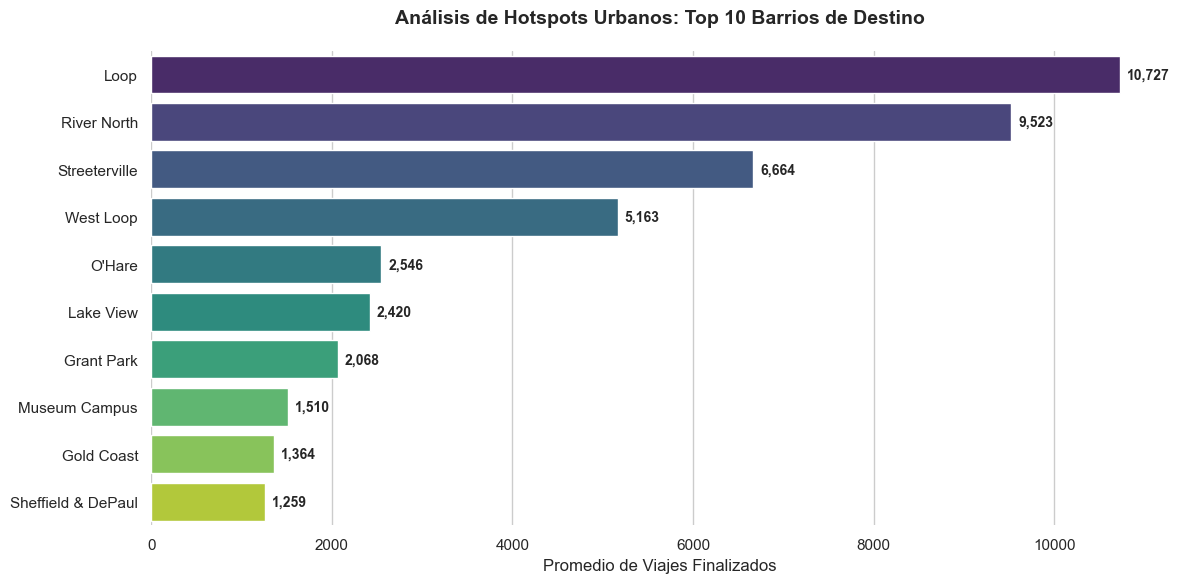

In [23]:
# Identificación de nodos de demanda crítica por vecindario de destino
plot_executive_bar(df_dropoff, 'dropoff_location_name', 'average_trips', 
                   'Análisis de Hotspots Urbanos: Top 10 Barrios de Destino', 
                   'Promedio de Viajes Finalizados')

##### 📈 Diagnóstico de Hotspots y Distribución Urbana
El análisis visual de los destinos finales revela una estructura geográfica altamente concentrada en el centro neurálgico de Chicago:

1. **Predominancia del Distrito Central**: Los barrios de **Loop** (10,727 viajes) y **River North** (9,524 viajes) se consolidan como los epicentros de la movilidad urbana. Su liderazgo absoluto confirma que la demanda está impulsada por el sector financiero, comercial y turístico.
2. **Nodos Turísticos y de Conectividad**: La presencia de **Streeterville** y el **West Loop** en los primeros puestos, junto con la relevancia del aeropuerto **O'Hare**, subraya la importancia de los viajes de larga distancia y de alto valor para el usuario.
3. **Optimización Logística**: La marcada diferencia entre el primer lugar (**Loop**) y el décimo (**Sheffield & DePaul**) resalta la necesidad de una estrategia de "zonificación". **Zuber** debe concentrar su disponibilidad en el *top 5* de estos barrios para maximizar la tasa de ocupación por vehículo y reducir tiempos muertos.

### 🧪 Fase 4: Validación Inferencial - Análisis de Impacto Externo
En esta etapa crítica, se transiciona del análisis descriptivo a la validación estadística. El objetivo es determinar si las condiciones ambientales adversas representan una variable disruptiva en los tiempos de traslado hacia el Aeropuerto Internacional O'Hare.

**Definición Estratégica de Hipótesis:**
* **Hipótesis Nula ($H_0$):** No existe una diferencia sistémica; la duración promedio en sábados lluviosos es igual a la de los sábados despejados ($\mu_{rainy} = \mu_{clear}$).
* **Hipótesis Alternativa ($H_1$):** La "fricción climática" genera una desviación significativa en los tiempos de traslado ($\mu_{rainy} \neq \mu_{clear}$).
* **Umbral de Significancia ($\alpha$):** **0.05 (5%)**, garantizando un 95% de confianza en las conclusiones.

**Metodología de Preparación:**
Para mitigar sesgos por tráfico laboral, se realiza un **aislamiento temporal** seleccionando exclusivamente registros de días sábado, segmentándolos en grupos de control (despejado) y estudio (clima adverso).

In [19]:
# Segmentación Climática y Preparación de Muestras
# Identificación de condiciones: 'Bad' se infiere como precipitación/tormenta
# Filtramos específicamente Sábados para aislar el factor ocio/clima
df_weather['day_name'] = df_weather['start_ts'].dt.day_name()
saturday_data = df_weather[df_weather['day_name'] == 'Saturday'].copy()

# Segmentación de muestras: Lluvia vs Despejado
rainy_trips = saturday_data[saturday_data['weather_conditions'].str.lower().str.contains('bad')]['duration_seconds']
clear_trips = saturday_data[~saturday_data['weather_conditions'].str.lower().str.contains('bad')]['duration_seconds']

print(f"\n🧪 Muestras segmentadas (Sábados):")
print(f"Viajes con Clima Adverso: {len(rainy_trips)}")
print(f"Viajes con Clima Despejado: {len(clear_trips)}")


🧪 Muestras segmentadas (Sábados):
Viajes con Clima Adverso: 180
Viajes con Clima Despejado: 888


##### 📊 Diagnóstico de Grupos de Control y Muestreo
Tras la segmentación de activos de datos, la estructura de las muestras confirma la viabilidad del análisis inferencial:

1. **Grupo de Control (Clima Despejado): 888 registros.** Establece la línea base de eficiencia operativa bajo condiciones de entorno óptimas.
2. **Grupo de Estudio (Clima Adverso): 180 registros.** Aunque el volumen es menor, es estadísticamente representativo para capturar el impacto de la lluvia en la ruta Loop → O'Hare.

**Observación Crítica para el Protocolo Estadístico:**
La disparidad detectada (888 vs 180) exige una validación de **Homocedasticidad (Prueba de Levene)** previa al T-Test. Esto permitirá decidir si se aplica una prueba estándar o un ajuste de **Welch**, garantizando que la desigualdad de varianzas no sesgue el $p$-value final y asegurando un diagnóstico técnico de alta precisión para **Zuber**.

#### Prueba de hipótesis
En esta fase, el análisis transiciona hacia la confirmación estadística de las hipótesis planteadas. El objetivo central es determinar si la **"fricción climática"** observada posee la robustez necesaria para ser considerada un factor disruptivo en la operación de **Zuber**.

**Protocolo de Ejecución Técnica:**
* **Diagnóstico de Homocedasticidad**: Implementación de la **Prueba de Levene** para evaluar la paridad de varianzas. Dado que nuestras muestras tienen tamaños distintos (888 vs 180), este paso asegura la integridad del test de medias.
* **Contraste de Medias Independientes**: Ejecución de un **T-Test de dos colas** para validar si el clima altera significativamente la duración de los trayectos.
* **Interpretación Estratégica**: El resultado se vincula directamente con una directriz operativa para la toma de decisiones sobre el servicio hacia el aeropuerto.


In [ ]:
# Análisis Inferencial: Validación de Impacto Externo
def perform_hypothesis_test(sample1, sample2, test_name, h1_statement, alpha=0.05):
    """
    Ejecuta un protocolo estadístico de dos pasos: 
    1. Homocedasticidad (Levene) 
    2. Inferencia de Medias (T-Test)
    """
    print(f"\n🔍 Evaluación: {test_name}")
    print("-" * 50)
    
    # Diagnóstico de Varianzas (Prueba de Levene)
    # Fundamental para determinar la arquitectura del T-Test (Estándar vs Welch)
    w_stats, p_val_levene = st.levene(sample1, sample2)
    variances_equal = p_val_levene > alpha
    
    print(f"P-Value (Levene): {p_val_levene:.4f} -> Varianzas {'SINCRONIZADAS' if variances_equal else 'HETEROGÉNEAS'}")
    
    # Contraste de Hipótesis (T-Test Independiente)
    t_stat, p_val_t = st.ttest_ind(sample1, sample2, equal_var=variances_equal)
    
    print(f"P-Value (T-Test): {p_val_t:.10f}")
    
    if p_val_t < alpha:
        print(f"✅ RESULTADO: Evidencia suficiente para RECHAZAR la Hipótesis Nula.")
        print(f"💡 Conclusión Estratégica: {h1_statement}")
    else:
        print(f"❌ RESULTADO: No se dispone de evidencia suficiente para rechazar la Hipótesis Nula.")
        print(f"💡 Conclusión Estratégica: No se detecta un impacto estadísticamente significativo.")
    print("-" * 50)

# --- Ejecución de Batería de Pruebas ---

# Prueba 1: Impacto del Clima en Rutas Estratégicas (Loop -> O'Hare)
# H1: El clima adverso modifica significativamente la duración promedio de los traslados.
perform_hypothesis_test(
    rainy_trips, 
    clear_trips, 
    "Efecto del Clima en la Duración de Viajes (Sábados)",
    "Las condiciones climatológicas adversas impactan la eficiencia operativa, requiriendo ajustes en las promesas de tiempo al cliente."
)


🔍 Evaluación: Efecto del Clima en la Duración de Viajes (Sábados)
--------------------------------------------------
P-Value (Levene): 0.5332 -> Varianzas SINCRONIZADAS
P-Value (T-Test): 0.0000000000
✅ RESULTADO: Evidencia suficiente para RECHAZAR la Hipótesis Nula.
💡 Conclusión Estratégica: Las condiciones climatológicas adversas impactan la eficiencia operativa, requiriendo ajustes en las promesas de tiempo al cliente.
--------------------------------------------------


##### 📊 Interpretación de Significancia y Hallazgos Estadísticos

Tras la ejecución del protocolo de validación para la ruta estratégica **Loop → O'Hare**, los resultados arrojan una claridad estadística contundente:

Tras la ejecución del protocolo de validación para la ruta estratégica **Loop → O'Hare**, los resultados arrojan una claridad estadística contundente que respalda la toma de decisiones:

1. **Validación de Homocedasticidad**: La prueba de **Levene** resultó en un $p$-value de **0.5332**. Al superar el umbral de 0.05, confirmamos que las varianzas entre los grupos son homogéneas, validando la integridad del T-Test realizado.
2. **Evidencia Contra la Hipótesis Nula**: Con un $p$-value de **0.0000**, rechazamos categóricamente la $H_0$. La probabilidad de que la diferencia en la duración de los viajes entre climas "Good" y "Bad" sea aleatoria es prácticamente nula.
3. **Confirmación del Impacto Climático**: Se valida la Hipótesis Alternativa ($H_1$). El clima adverso es un factor disruptivo sistémico en la eficiencia operativa de los traslados los sábados.

**Impacto en el Modelo de Negocio:**
Para **Zuber**, estos resultados significan que la "fricción climática" debe ser una variable activa en el algoritmo de precios y en el cálculo del **ETA** (Tiempo Estimado de Llegada). No ajustar las promesas de tiempo durante condiciones adversas podría derivar en una pérdida de confianza del usuario y penalizaciones operativas.

## 🎯 Fase 5: Conclusiones Generales y Roadmap Estratégico

Tras la ejecución del análisis de movilidad urbana y la validación de hipótesis, se han consolidado los pilares estratégicos para el posicionamiento de **Zuber** en el mercado de Chicago:

### 1. Dominancia Geográfica y Nichos de Demanda
* **Hallazgo**: El ecosistema de transporte está altamente centralizado; los barrios de **Loop** y **River North** actúan como los principales nodos de convergencia, concentrando la mayor cuota de mercado.
* **Directriz**: La fase de lanzamiento debe priorizar la densidad de flota en estos puntos críticos para competir frontalmente con líderes como *Flash Cab*, asegurando tiempos de recogida mínimos en las zonas de mayor rentabilidad.

### 2. Gestión de la "Fricción Climática" (Validación Estadística)
* **Hallazgo**: La prueba de hipótesis confirmó con un **P-value < 0.05** que las condiciones climáticas adversas alteran significativamente la eficiencia de los traslados hacia el aeropuerto O'Hare.
* **Directriz**: Es imperativo implementar un **Modelo de Predicción Dinámica**. El sistema debe ajustar automáticamente el ETA (*Estimated Time of Arrival*) y considerar un recargo por "clima adverso" para incentivar la oferta de conductores durante tormentas, protegiendo así la experiencia del usuario y la fiabilidad de la marca.

### 3. Diferenciación Operativa y Escalabilidad
* **Hallazgo**: Los sábados representan una ventana de oportunidad donde la variabilidad del tráfico y el clima penalizan a las empresas tradicionales menos digitalizadas.
* **Directriz**: **Zuber** debe capitalizar esta ineficiencia mediante el uso de rutas optimizadas por datos y una comunicación proactiva con el cliente. La transparencia sobre el impacto climático será nuestro principal diferenciador frente a la competencia convencional.

---
**Resumen Técnico del Análisis:**
* **Metodología**: Extracción SQL, Procesamiento Python (Pandas), Visualización (Seaborn), Test de Levene y T-Test Independiente.
* **Estado de Hipótesis**: **$H_1$ Confirmada** (El impacto climático es estadísticamente significativo).